In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GlpG_seq = "ERAGPVTWVMMIACVVVFIAMQILGDQEVMLWLAWPFDPTLKFEFWRYFTHALMHFSLMHILFNLLWWWYLGGAVEKRLGSGKLIVITLISALLSGYVQQKFSGPWFGGLSGVVYALMGYVWLRGERDPQSGIYLQRGLIIFALIWIVAGWFDLFGMSMANGAHIAGLAVGLAMAFVDSLN"

In [3]:
seq = GlpG_seq
len(seq)

181

In [4]:
seq_dataFrame = pd.DataFrame({"oneLetterCode":list(seq)})
HFscales = pd.read_table("/Users/weilu/opt/small_script/Whole_residue_HFscales.txt")
# Octanol Scale
# code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
#         "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
#         "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
#         "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
#         "GLN" : "Q", "PHE" : "F", "HIS+" : "H", "VAL" : "V",
#         "M3L" : "K", "MSE" : "M", "CAS" : "C" }
code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
        "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
        "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
        "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
        "GLN" : "Q", "PHE" : "F", "HIS0" : "H", "VAL" : "V",
        "M3L" : "K", "MSE" : "M", "CAS" : "C" }
HFscales_with_oneLetterCode = HFscales.assign(oneLetterCode = HFscales.AA.str.upper().map(code)).dropna()
data = seq_dataFrame.merge(HFscales_with_oneLetterCode, on="oneLetterCode", how="left")

In [43]:
HFscales

,AA,DGwif,DGwoct,Oct-IF
0,Ala,0.17,0.50,0.33
1,Arg+,0.81,1.81,1.00
2,Asn,0.42,0.85,0.43
3,Asp-,1.23,3.64,2.41
4,Asp0,-0.07,0.43,0.50
5,Cys,-0.24,-0.02,0.22
6,Gln,0.58,0.77,0.19
7,Glu-,2.02,3.63,1.61
8,Glu0,-0.01,0.11,0.12
9,Gly,0.01,1.15,1.14


In [5]:
x = HFscales_with_oneLetterCode["DGwif"].values
y = HFscales_with_oneLetterCode["DGwoct"].values

In [59]:
# z = data["DGwoct"].values
# np.savetxt("/Users/weilu/Research/server/mar_2018/extra_03_week/refold/force_0.01_/simulation/0/test", z, fmt="%.2f")

In [8]:
data.query("oneLetterCode == 'H'")

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF
50,H,His0,0.17,0.11,-0.06
54,H,His0,0.17,0.11,-0.06
59,H,His0,0.17,0.11,-0.06
163,H,His0,0.17,0.11,-0.06


In [10]:
import scipy
from scipy import stats

In [11]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

In [12]:
r_value

0.91940864394069144

In [13]:
intercept

0.23821446874895916

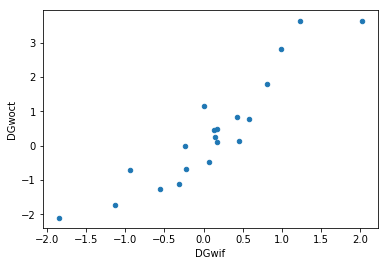

In [14]:
HFscales_with_oneLetterCode.plot("DGwif", "DGwoct", kind="scatter")

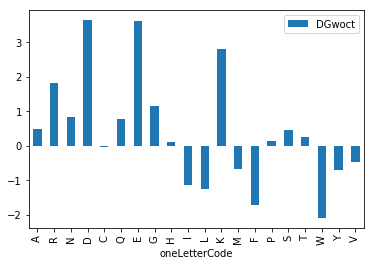

In [15]:
HFscales_with_oneLetterCode.plot("oneLetterCode", "DGwoct", kind="bar")

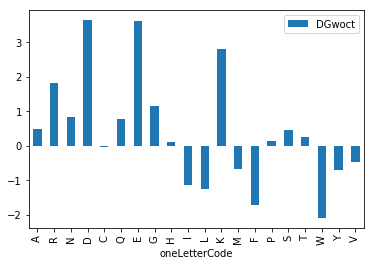

In [16]:
HFscales_with_oneLetterCode.plot("oneLetterCode", "DGwoct", kind="bar")

In [25]:
def isHelix(id):
    helices_list = [(94,114), (147,168), (171, 192), (200, 217), (226, 241), (250, 269)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix"] = data["resId"].apply(isHelix)

In [18]:
def isHelix2(id):
    helices_list = [(95,114), (148,169), (171, 193), (201, 217), (227, 241), (251, 268)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix"] = data["resId"].apply(isHelix2)

In [38]:
def isHelix3(id):
    helices_list = [(91,114), (115,169), (171, 192), (193, 217), (226, 241), (242, 268)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix"] = data["resId"].apply(isHelix3)

In [60]:
data

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF,resId,isHelix
0,E,Glu-,2.02,3.63,1.61,91,1
1,R,Arg+,0.81,1.81,1.00,92,1
2,A,Ala,0.17,0.50,0.33,93,1
3,G,Gly,0.01,1.15,1.14,94,1
4,P,Pro,0.45,0.14,-0.31,95,1
5,V,Val,0.07,-0.46,-0.53,96,1
6,T,Thr,0.14,0.25,0.11,97,1
7,W,Trp,-1.85,-2.09,-0.24,98,1
8,V,Val,0.07,-0.46,-0.53,99,1
9,M,Met,-0.23,-0.67,-0.44,100,1


In [42]:
data.query("isHelix == 5")

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF,resId,isHelix
135,Q,Gln,0.58,0.77,0.19,226,5
136,R,Arg+,0.81,1.81,1.00,227,5
137,G,Gly,0.01,1.15,1.14,228,5
138,L,Leu,-0.56,-1.25,-0.69,229,5
139,I,Ile,-0.31,-1.12,-0.81,230,5
140,I,Ile,-0.31,-1.12,-0.81,231,5
141,F,Phe,-1.13,-1.71,-0.58,232,5
142,A,Ala,0.17,0.50,0.33,233,5
143,L,Leu,-0.56,-1.25,-0.69,234,5
144,I,Ile,-0.31,-1.12,-0.81,235,5


In [40]:
# pd.options.display.max_rows = 999
# data

In [41]:
data.groupby("isHelix").sum()

,DGwif,DGwoct,Oct-IF,resId
isHelix,,,,
0,0.59,4.29,3.70,2752
1,-0.53,-3.49,-2.96,2460
2,-10.74,-5.24,5.50,7810
3,-1.24,-0.13,1.11,3993
4,-3.83,2.60,6.43,5125
5,-5.37,-7.45,-2.08,3736
6,-1.69,3.37,5.06,6885


In [32]:
a = data.groupby("isHelix").sum()[1:].reset_index()

In [33]:
a["group"] = (a["isHelix"]+1) // 2

In [34]:
b = a.groupby("group").sum()

In [35]:
b

,isHelix,DGwif,DGwoct,Oct-IF,resId
group,,,,,
1,3,-14.28,-15.82,-1.54,9900
2,7,-5.07,2.47,7.54,9118
3,11,-7.06,-4.08,2.98,10621


In [21]:
b

,isHelix,DGwif,DGwoct,Oct-IF,resId
group,,,,,
1,3,-10.39,-17.02,-6.63,5577
2,7,-2.01,3.93,5.94,7739
3,11,-5.90,-4.59,1.31,8181


In [22]:
-4.59*1.6

-7.344

In [23]:
a.reset_index(drop=True)

,isHelix,DGwif,DGwoct,Oct-IF,resId,group
0,1,-3.54,-10.58,-7.04,2090,1
1,2,-6.85,-6.44,0.41,3487,1
2,3,-1.11,0.33,1.44,4186,2
3,4,-0.90,3.60,4.50,3553,2
4,5,-5.95,-8.22,-2.27,3510,3
5,6,0.05,3.63,3.58,4671,3


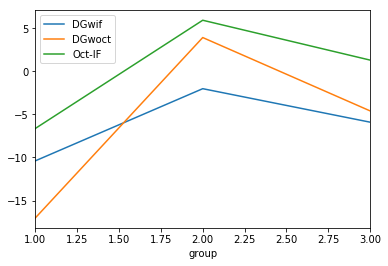

In [24]:
b.drop(["resId", "isHelix"],axis=1).plot()

In [25]:
6*0.6

3.5999999999999996

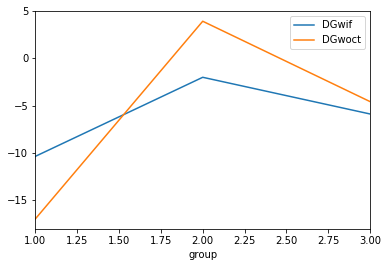

In [26]:
b.drop(["resId", "isHelix", "Oct-IF"],axis=1).plot()

In [30]:
data = pd.read_feather("/Users/weilu/Research/data/pulling/GlpG_Hydrophobicity.feather")

In [ ]:
# data.join(zim123).to_feather("/Users/weilu/Research/data/pulling/GlpG_Hydrophobicity.feather")

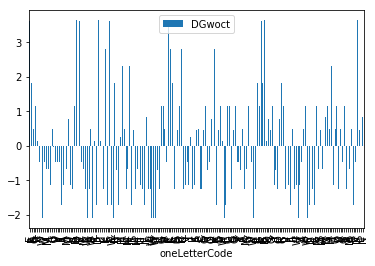

In [31]:
data.plot("oneLetterCode", "DGwoct", kind="bar")
plt.show()

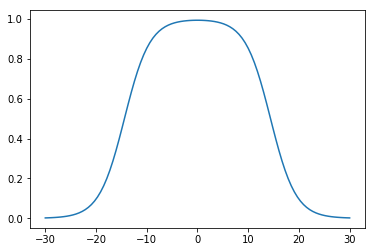

In [32]:
def V_membrane(z, kbin=0.2, memb=14.4):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
kbin = 0.2
memb = 14.4
z = np.linspace(-30,30,100)
v = V_membrane(z, kbin, memb)
plt.plot(z,v)

In [33]:
V_membrane(-20)/V_membrane(0)

0.096822766552771625

In [34]:
V_membrane(-10)/V_membrane(0)

0.85854569921930957